<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/FbProphet_Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 672 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objs as go

In [3]:
btc=yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#bitcoin
eth=yf.download(tickers='ETH-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#etherum
bnb=yf.download(tickers='BNB-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#binance

aapl = yf.download(tickers='AAPL', start='2020-01-01', end='2022-11-30', interval = '1d')#apple
tsla=yf.download(tickers='TSLA', start='2020-01-01', end='2022-11-30', interval = '1d')#tesla
googl=yf.download(tickers='GOOGL', start='2020-01-01', end='2022-11-30', interval = '1d')#google

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
def clean_data_fit_model(data):
 data.reset_index(inplace=True)
 data['Date'] = pd.to_datetime(data['Date'])
 df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
 df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
 df_train = df[df['ds']<='2022-1-30']
 df_test = df[df['ds']>'2022-1-30']
 m = Prophet(interval_width=0.95, n_changepoints=15)
 m.fit(df_train)

 future = m.make_future_dataframe(periods=31)
 # Forecast the future dataframe values
 forecast = m.predict(future)
 # Check the forecasted values and upper/lower bound
 forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
 # Visualize the forecast
 fig = m.plot(forecast)
 ax = fig.gca()
 ax.plot( df_test["ds"], df_test["y"], 'r.')

 print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')
 fig = m.plot(forecast)
 a = add_changepoints_to_plot(fig.gca(), m, forecast)

 df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")

 df_p = performance_metrics(df_cv)
 df_p.head()
 return df_p


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/j5nz74kl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/vc7kr9_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9706', 'data', 'file=/tmp/tmpfrpanlsu/j5nz74kl.json', 'init=/tmp/tmpfrpanlsu/vc7kr9_f.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelpr7g9e5g/prophet_model-20221215100616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concurr

There are 15 change points. 
The change points dates are 
     level_0  index         ds             y
40        40     40 2020-02-10   9856.611328
81        81     81 2020-03-22   5830.254883
121      121    121 2020-05-01   8864.766602
162      162    162 2020-06-11   9321.781250
202      202    202 2020-07-21   9374.887695
243      243    243 2020-08-31  11680.820312
283      283    283 2020-10-10  11296.361328
324      324    324 2020-11-20  18621.314453
364      364    364 2020-12-30  28840.953125
405      405    405 2021-02-09  46481.105469
445      445    445 2021-03-21  57523.421875
486      486    486 2021-05-01  57828.050781
526      526    526 2021-06-10  36702.597656
567      567    567 2021-07-21  32110.693359
607      607    607 2021-08-30  47054.984375


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/zcgutcvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/1g_u746y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/bfu49mot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/2z0876aj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34578', 'data', 'file=/tmp/tmpfrpanlsu/zcgutcvf.json', 'init=/tmp/tmpfrpanlsu/bfu49mot.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_model4ihrbfyu/prophet_model-20221215100617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88378', 'data', 'file=/tmp/tmpfrpanlsu/1g_u746y.json', 'init=/tmp/tmpfrpanlsu/2z0876aj.json', 'output', 'file=/tmp

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.132842e+07,4618.270369,4205.633165,0.093371,0.108051,0.094441,0.583333
1,4 days,2.643303e+07,5141.306433,4487.502352,0.100321,0.122348,0.101297,0.500000
2,5 days,3.143904e+07,5607.052960,4522.395437,0.104513,0.122753,0.103903,0.416667
3,6 days,3.462631e+07,5884.412594,4525.378268,0.107328,0.123204,0.104964,0.500000
4,7 days,4.315466e+07,6569.220720,5042.560487,0.120848,0.113267,0.116679,0.416667


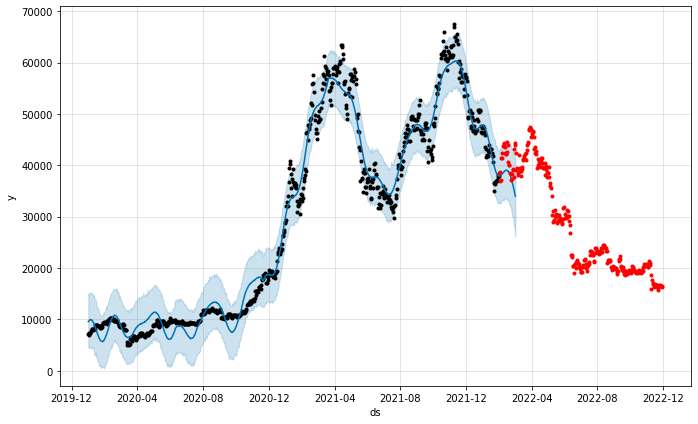

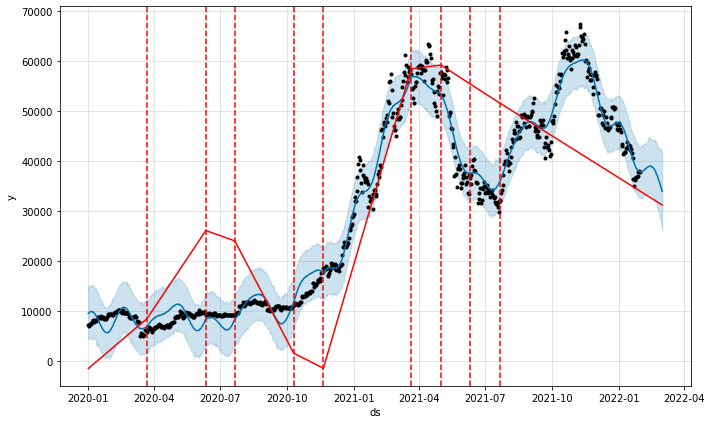

In [15]:
clean_data_fit_model(btc).head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/5vj13bap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/sfryzako.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86714', 'data', 'file=/tmp/tmpfrpanlsu/5vj13bap.json', 'init=/tmp/tmpfrpanlsu/sfryzako.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelwjdv7yud/prophet_model-20221215100620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
     index         ds            y
40      40 2020-02-10   223.522705
81      81 2020-03-22   123.321152
121    121 2020-05-01   214.219101
162    162 2020-06-11   231.702667
202    202 2020-07-21   245.016724
243    243 2020-08-31   435.079742
283    283 2020-10-10   370.967590
324    324 2020-11-20   509.744568
364    364 2020-12-30   751.618958
405    405 2021-02-09  1768.035034
445    445 2021-03-21  1788.217041
486    486 2021-05-01  2945.892822
526    526 2021-06-10  2471.518555
567    567 2021-07-21  1990.970825
607    607 2021-08-30  3224.374268


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/rksceouy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/shpnxf6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/p4egnj1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/ihezohj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10707', 'data', 'file=/tmp/tmpfrpanlsu/rksceouy.json', 'init=/tmp/tmpfrpanlsu/p4egnj1u.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modeljl6mgk2b/prophet_model-20221215100621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22833', 'data', 'file=/tmp/tmpfrpanlsu/shpnxf6z.json', 'init=/tmp/tmpfrpanlsu/ihezohj0.json', 'output', 'file=/tmp

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,5.040836e+05,709.988457,635.469708,0.164410,0.163368,0.172012,0.250000
1,4 days,5.186589e+05,720.179742,649.274548,0.170975,0.167431,0.177631,0.250000
2,5 days,5.272844e+05,726.143497,660.969007,0.182033,0.159312,0.183687,0.250000
3,6 days,5.707513e+05,755.480839,693.903122,0.199847,0.167616,0.195612,0.166667
4,7 days,6.930944e+05,832.522886,746.871478,0.220438,0.172465,0.208866,0.166667
5,8 days,8.540518e+05,924.149233,815.659092,0.248180,0.179568,0.229124,0.166667
6,9 days,9.542480e+05,976.856198,855.621959,0.269929,0.182096,0.243595,0.166667
7,10 days,1.025652e+06,1012.744542,888.139799,0.287248,0.212650,0.255953,0.083333
8,11 days,1.026885e+06,1013.353384,900.527430,0.294255,0.235828,0.262006,0.000000
9,12 days,1.025805e+06,1012.820077,914.765977,0.297820,0.239996,0.266798,0.000000


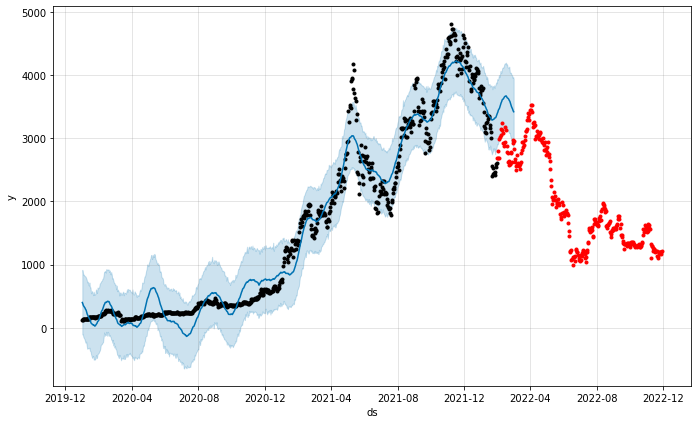

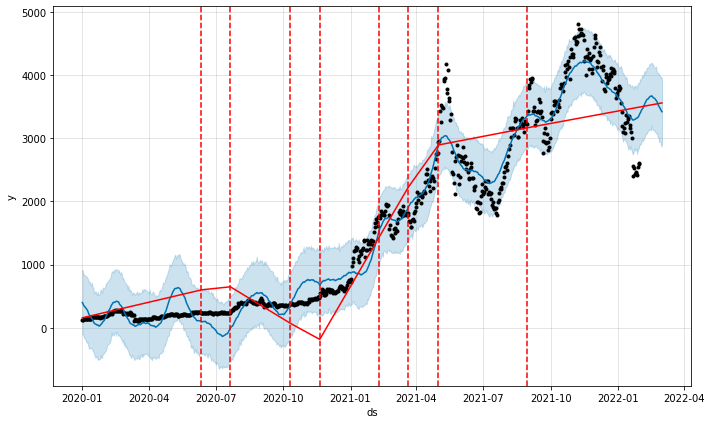

In [16]:
clean_data_fit_model(eth)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/qr5102wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/bmalq22b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5334', 'data', 'file=/tmp/tmpfrpanlsu/qr5102wk.json', 'init=/tmp/tmpfrpanlsu/bmalq22b.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelkjnjx4up/prophet_model-20221215100624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-12-31 00:00:00
INFO:prophet:Applying in parallel with <concurr

There are 15 change points. 
The change points dates are 
     index         ds           y
40      40 2020-02-10   25.218315
81      81 2020-03-22   11.158228
121    121 2020-05-01   17.564993
162    162 2020-06-11   16.308926
202    202 2020-07-21   17.715408
243    243 2020-08-31   23.193050
283    283 2020-10-10   28.312487
324    324 2020-11-20   28.891996
364    364 2020-12-30   38.136299
405    405 2021-02-09  107.899277
445    445 2021-03-21  264.886169
486    486 2021-05-01  619.347229
526    526 2021-06-10  352.183197
567    567 2021-07-21  292.531372
607    607 2021-08-30  459.490753


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/lp8h5k3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/xmn3kp03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/izfrsd66.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6484', 'data', 'file=/tmp/tmpfrpanlsu/lp8h5k3q.json', 'init=/tmp/tmpfrpanlsu/izfrsd66.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelt3y04qmc/prophet_model-20221215100625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/xn8q1gvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69317', 'data', 

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,6982.989603,83.564284,70.844012,0.138401,0.150586,0.149936,0.500000
1,4 days,8908.548430,94.385107,79.537179,0.151861,0.164688,0.165686,0.500000
2,5 days,10575.156376,102.835579,86.032185,0.164114,0.164688,0.176402,0.500000
3,6 days,12565.882387,112.097647,92.384064,0.175000,0.189131,0.186305,0.500000
4,7 days,14424.350896,120.101419,97.120694,0.185162,0.200296,0.193388,0.500000
5,8 days,15888.176354,126.048310,102.790713,0.201013,0.206542,0.206212,0.500000
6,9 days,16220.355326,127.359159,106.330102,0.215537,0.220997,0.217224,0.500000
7,10 days,16783.563092,129.551392,110.180422,0.229817,0.235595,0.228735,0.500000
8,11 days,16239.051729,127.432538,109.398624,0.227124,0.235595,0.227966,0.500000
9,12 days,16905.836897,130.022448,111.906907,0.227393,0.234319,0.232620,0.416667


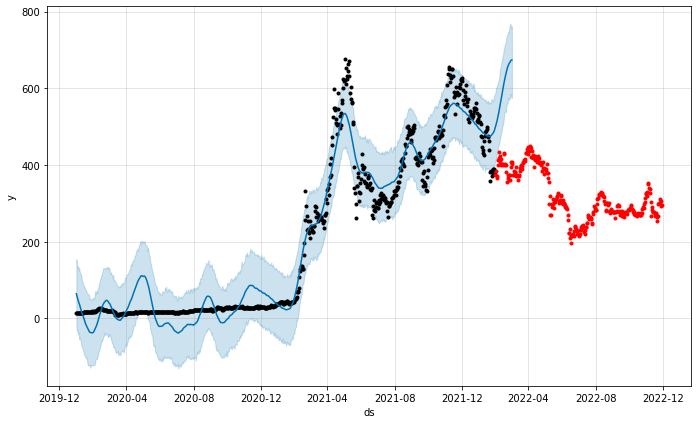

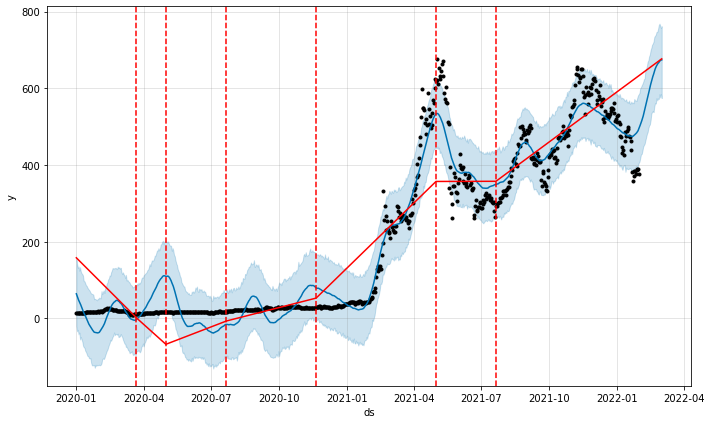

In [17]:
clean_data_fit_model(bnb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/_4r8lfyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/87xj16la.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72171', 'data', 'file=/tmp/tmpfrpanlsu/_4r8lfyy.json', 'init=/tmp/tmpfrpanlsu/87xj16la.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelbyemdxgz/prophet_model-20221215100628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-02 00:00:00 and 2021-12-29 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
     index         ds           y
28      28 2020-02-12   75.931503
56      56 2020-03-24   56.500500
84      84 2020-05-04   66.144997
111    111 2020-06-11   70.095001
139    139 2020-07-22   78.242500
167    167 2020-08-31   81.476501
195    195 2020-10-09   75.522499
223    223 2020-11-18   87.031998
251    251 2020-12-30   86.812500
279    279 2021-02-10  104.323997
307    307 2021-03-23  102.066498
334    334 2021-04-30  117.675003
362    362 2021-06-10  121.756500
390    390 2021-07-21  127.549004
418    418 2021-08-30  144.590500


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/a5f2rp43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/s4023klq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/g39dftif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13834', 'data', 'file=/tmp/tmpfrpanlsu/s4023klq.json', 'init=/tmp/tmpfrpanlsu/g39dftif.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_model__y1mlzg/prophet_model-20221215100629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/wbjwi60q.json
10:06:29 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 0
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14941', 'data',

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2.950321,1.717650,1.358923,0.009768,0.008680,0.009810,1.000000
1,5 days,3.447820,1.856831,1.510100,0.011142,0.006280,0.011225,1.000000
2,6 days,3.800411,1.949464,1.726491,0.012754,0.010929,0.012862,1.000000
3,7 days,5.584576,2.363171,2.023639,0.014710,0.011969,0.014700,0.875000
4,8 days,7.462907,2.731832,2.245653,0.016247,0.010479,0.016128,0.750000
5,9 days,10.750188,3.278748,2.631867,0.019060,0.010479,0.018827,0.625000
6,10 days,7.868716,2.805123,2.054381,0.014953,0.008310,0.014798,0.750000
7,11 days,6.988696,2.643614,2.029849,0.014783,0.012601,0.014679,0.875000
8,12 days,7.801440,2.793106,2.445555,0.017800,0.018354,0.017718,0.875000
9,13 days,7.984494,2.825685,2.623123,0.018874,0.018354,0.018770,0.875000


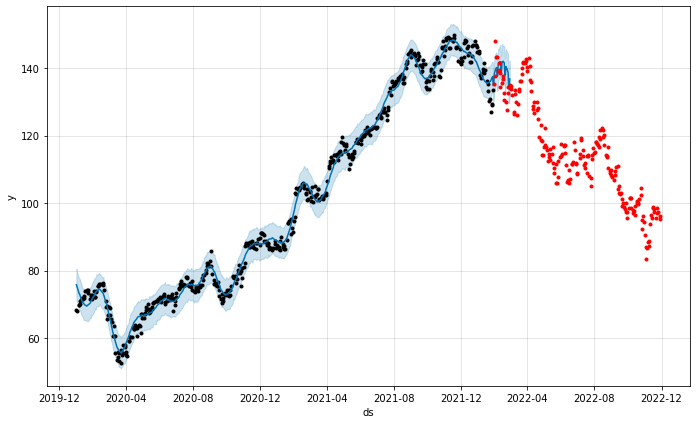

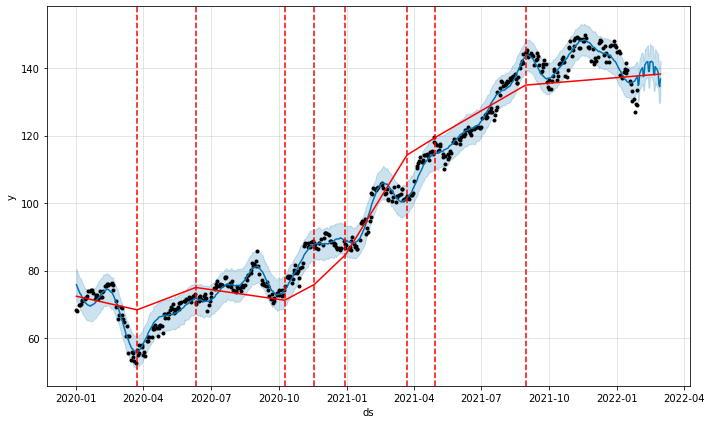

In [18]:
clean_data_fit_model(googl
                     )

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/bpdmggds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/s5mr32om.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11897', 'data', 'file=/tmp/tmpfrpanlsu/bpdmggds.json', 'init=/tmp/tmpfrpanlsu/s5mr32om.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelg5ehxmp2/prophet_model-20221215100632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-02 00:00:00 and 2021-12-29 00:00:00
INFO:prophet:Applying in parallel with <concur

There are 15 change points. 
The change points dates are 
     index         ds           y
28      28 2020-02-12   81.800003
56      56 2020-03-24   61.720001
84      84 2020-05-04   73.290001
111    111 2020-06-11   83.974998
139    139 2020-07-22   97.272499
167    167 2020-08-31  129.039993
195    195 2020-10-09  116.970001
223    223 2020-11-18  118.029999
251    251 2020-12-30  133.720001
279    279 2021-02-10  135.389999
307    307 2021-03-23  122.540001
334    334 2021-04-30  131.460007
362    362 2021-06-10  126.110001
390    390 2021-07-21  145.399994
418    418 2021-08-30  153.119995


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/0s9nj1_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/f5m0i45w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/knvcal7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/sf2arvr6.json
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70435', 'data', 'file=/tmp/tmpfrpanlsu/f5m0i45w.json', 'init=/tmp/tmpfrpanlsu/knvcal7v.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelsejetw1r/prophet_model-20221215100633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36636', 'data', 'file=/tmp/tmpfrpanlsu/0s9nj1_3.json', 'init=/tmp/tmpfrpanlsu/sf2arvr6.json', 'output', 'file=/tmp

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,23.074214,4.803563,3.806593,0.025346,0.024659,0.025868,0.750000
1,5 days,40.171307,6.338084,5.761351,0.037964,0.042086,0.038871,0.500000
2,6 days,49.610824,7.043495,6.775122,0.044619,0.051381,0.045747,0.375000
3,7 days,46.986662,6.854682,6.380278,0.041752,0.046579,0.042804,0.333333
4,8 days,41.521193,6.443694,5.975192,0.038745,0.042467,0.039558,0.375000
5,9 days,40.810330,6.388296,6.041579,0.038710,0.041558,0.039395,0.500000
6,10 days,42.200893,6.496221,6.191690,0.040185,0.041558,0.040931,0.500000
7,11 days,48.900457,6.992886,6.649307,0.044222,0.048043,0.045262,0.500000
8,12 days,60.351143,7.768600,7.167428,0.047932,0.046490,0.049243,0.500000
9,13 days,67.097301,8.191294,7.424366,0.049091,0.046514,0.050521,0.562500


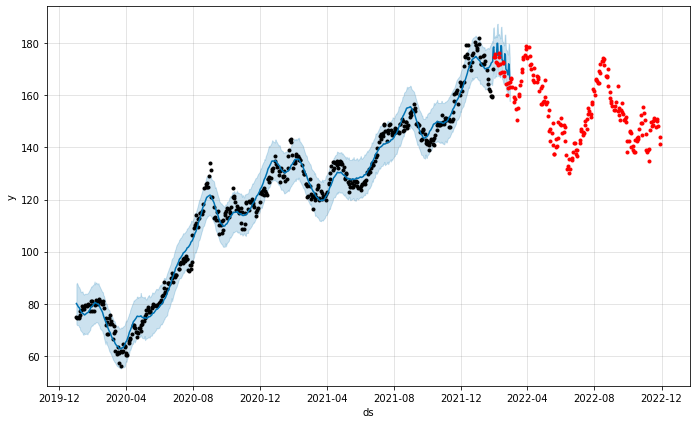

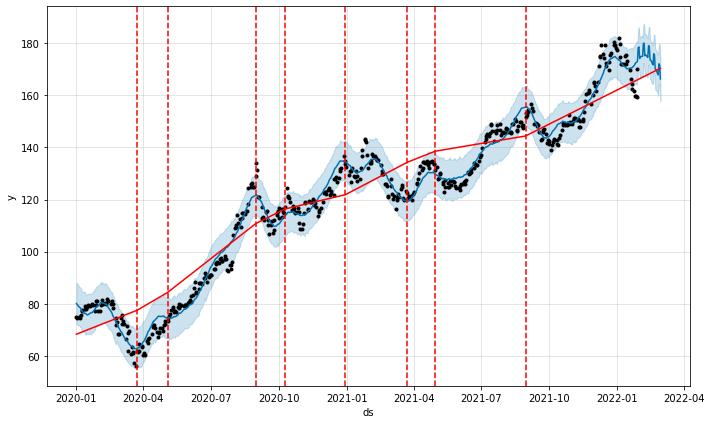

In [19]:
clean_data_fit_model(aapl)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/q3qlf50f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/z6xh71b_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24654', 'data', 'file=/tmp/tmpfrpanlsu/q3qlf50f.json', 'init=/tmp/tmpfrpanlsu/z6xh71b_.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelcgiy2if0/prophet_model-20221215100635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


There are 15 change points. 
The change points dates are 
     index         ds           y
28      28 2020-02-12   51.152668
56      56 2020-03-24   33.666668
84      84 2020-05-04   50.745998
111    111 2020-06-11   64.856003
139    139 2020-07-22  106.155334
167    167 2020-08-31  166.106674
195    195 2020-10-09  144.666672
223    223 2020-11-18  162.213333
251    251 2020-12-30  231.593338
279    279 2021-02-10  268.273346
307    307 2021-03-23  220.720001
334    334 2021-04-30  236.479996
362    362 2021-06-10  203.373337
390    390 2021-07-21  218.429993
418    418 2021-08-30  243.636673


INFO:prophet:Making 4 forecasts with cutoffs between 2021-07-02 00:00:00 and 2021-12-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f6c724df4f0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/gbxvf_v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/vpvk0x82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/nvo91vv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27617', 'data', 'file=/tmp/tmpfrpanlsu/gbxvf_v_.json', 'init=/tmp/tmpfrpanlsu/nvo91vv0.json', 'output', 'file=/tmp/tmpfrpanlsu/prophet_modelbh66m5j6/prophet_model-20221215100636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfrpanlsu/3ikzx494.json
DEBU

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,4528.449188,67.293753,49.308559,0.129979,0.090758,0.143740,0.437500
1,5 days,5137.006460,71.672913,52.800915,0.140838,0.073610,0.157586,0.416667
2,6 days,5248.761462,72.448336,54.727149,0.148339,0.084936,0.164413,0.500000
3,7 days,3497.165095,59.136834,43.284898,0.123451,0.081121,0.130603,0.583333
4,8 days,2886.941436,53.730266,40.748530,0.118850,0.081121,0.120283,0.625000
5,9 days,3151.434493,56.137639,44.326666,0.130834,0.117807,0.128452,0.500000
6,10 days,3064.670461,55.359466,42.489987,0.124582,0.099988,0.125368,0.500000
7,11 days,3064.309919,55.356209,43.188821,0.128580,0.114477,0.133455,0.500000
8,12 days,2429.133726,49.286243,40.389551,0.126020,0.126599,0.128033,0.375000
9,13 days,3098.784628,55.666728,47.844548,0.148668,0.129827,0.146068,0.187500


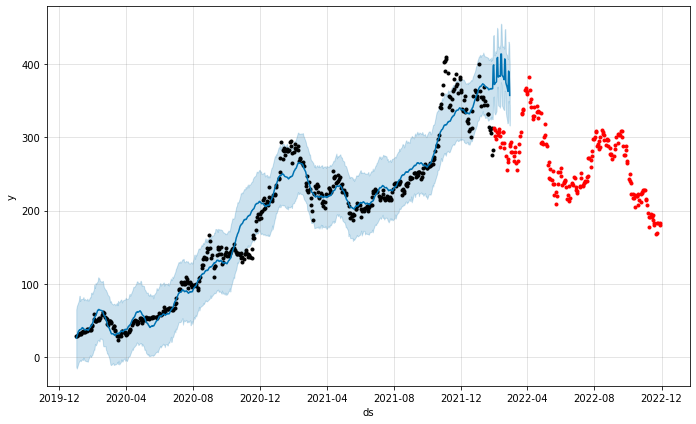

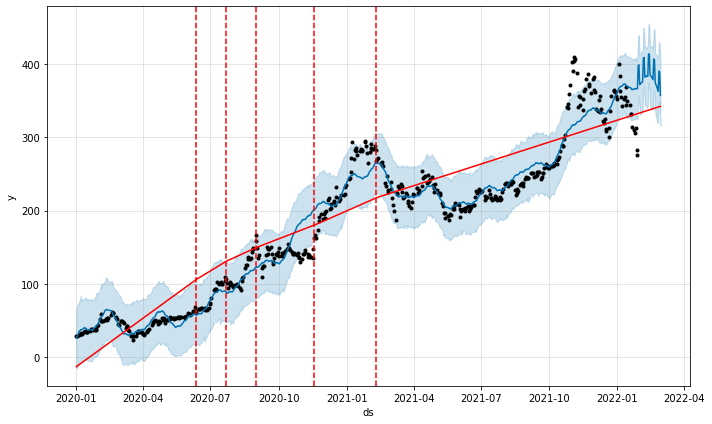

In [20]:
clean_data_fit_model(tsla)